In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data collection and description

In [2]:
df = pd.read_csv("C:\\Users\\chakri\\Downloads\\Fraud_check (2).csv")


In [3]:
df1 = df.copy()

In [4]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [6]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# Outlier Check

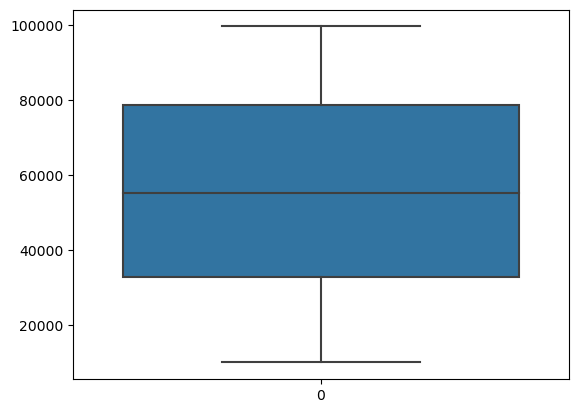

In [8]:
ax = sns.boxplot(df1['Taxable.Income'])

There are no outliers in the data

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


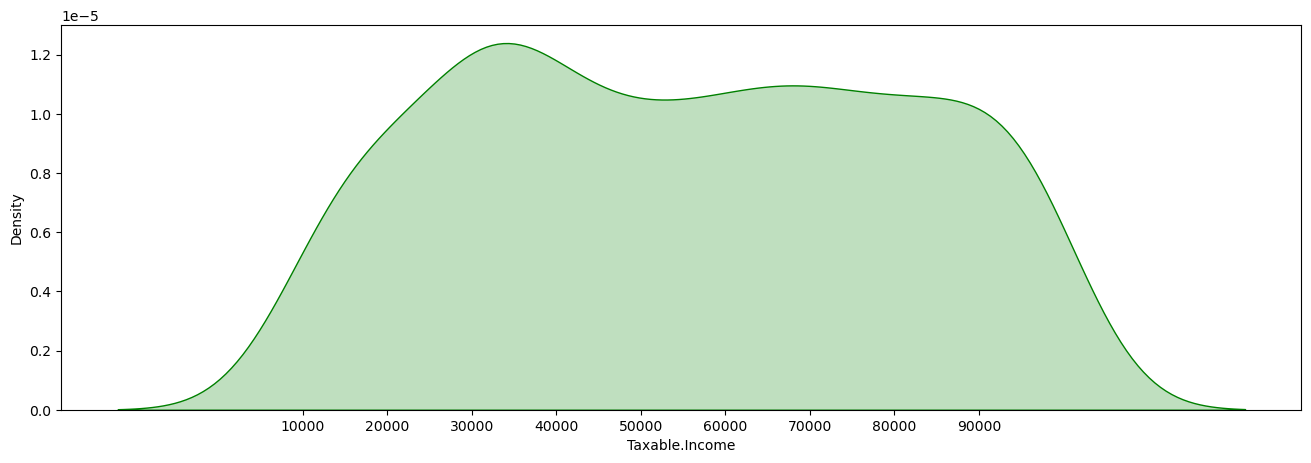

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right

The data has negative Kurtosis

In [13]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

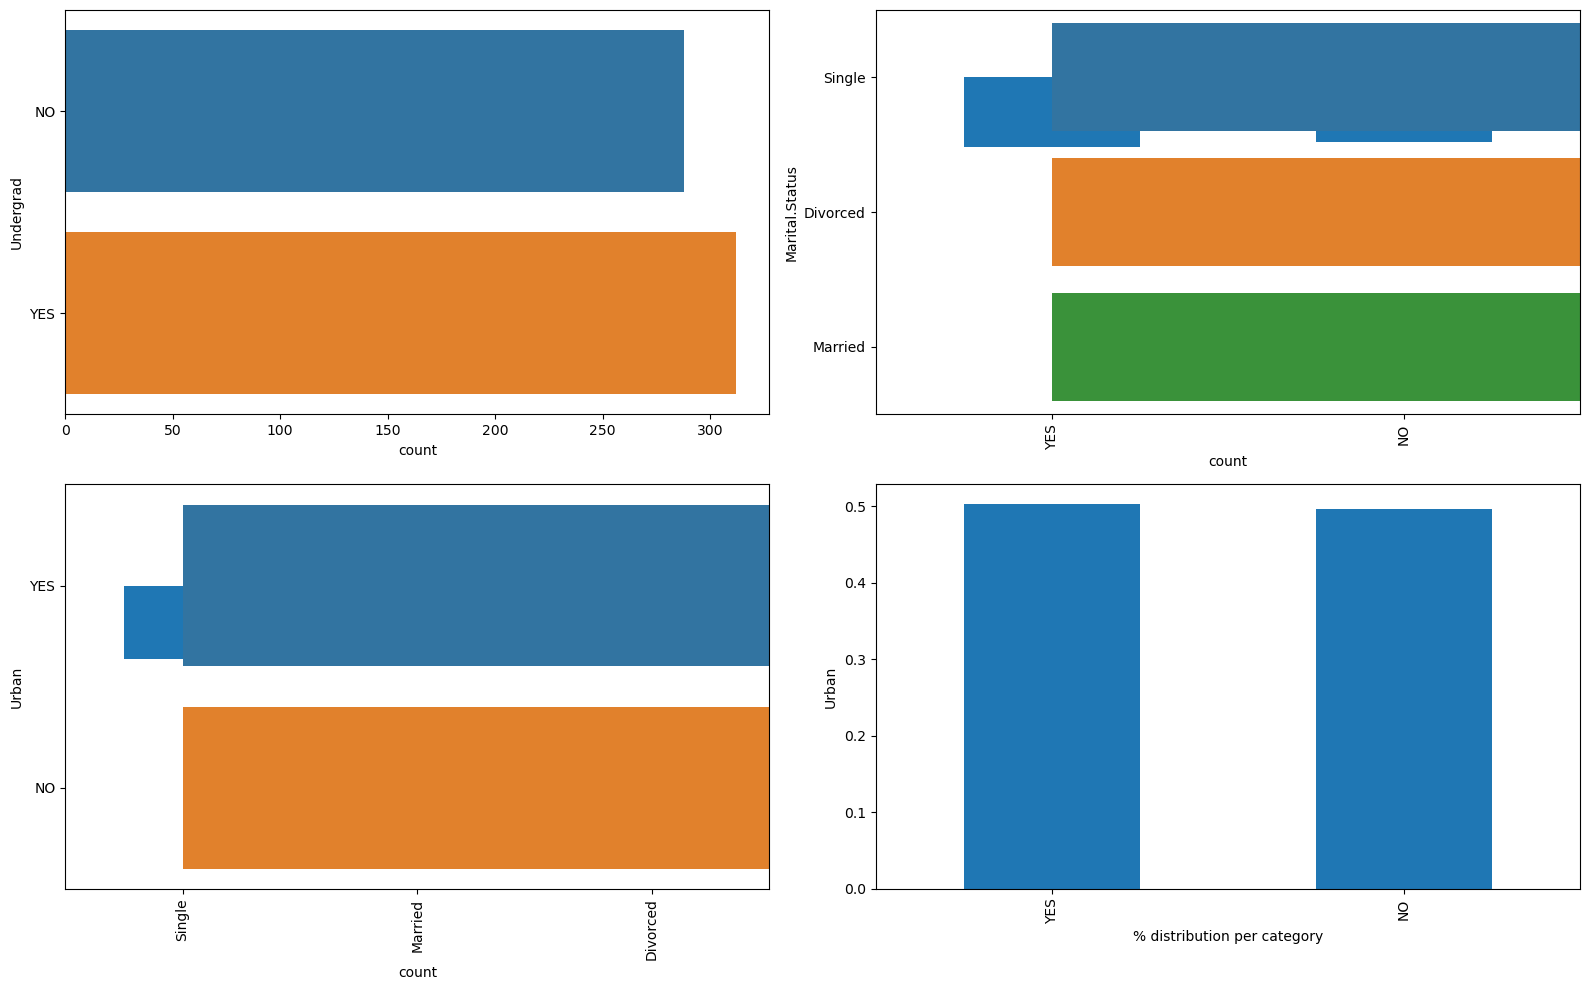

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [15]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

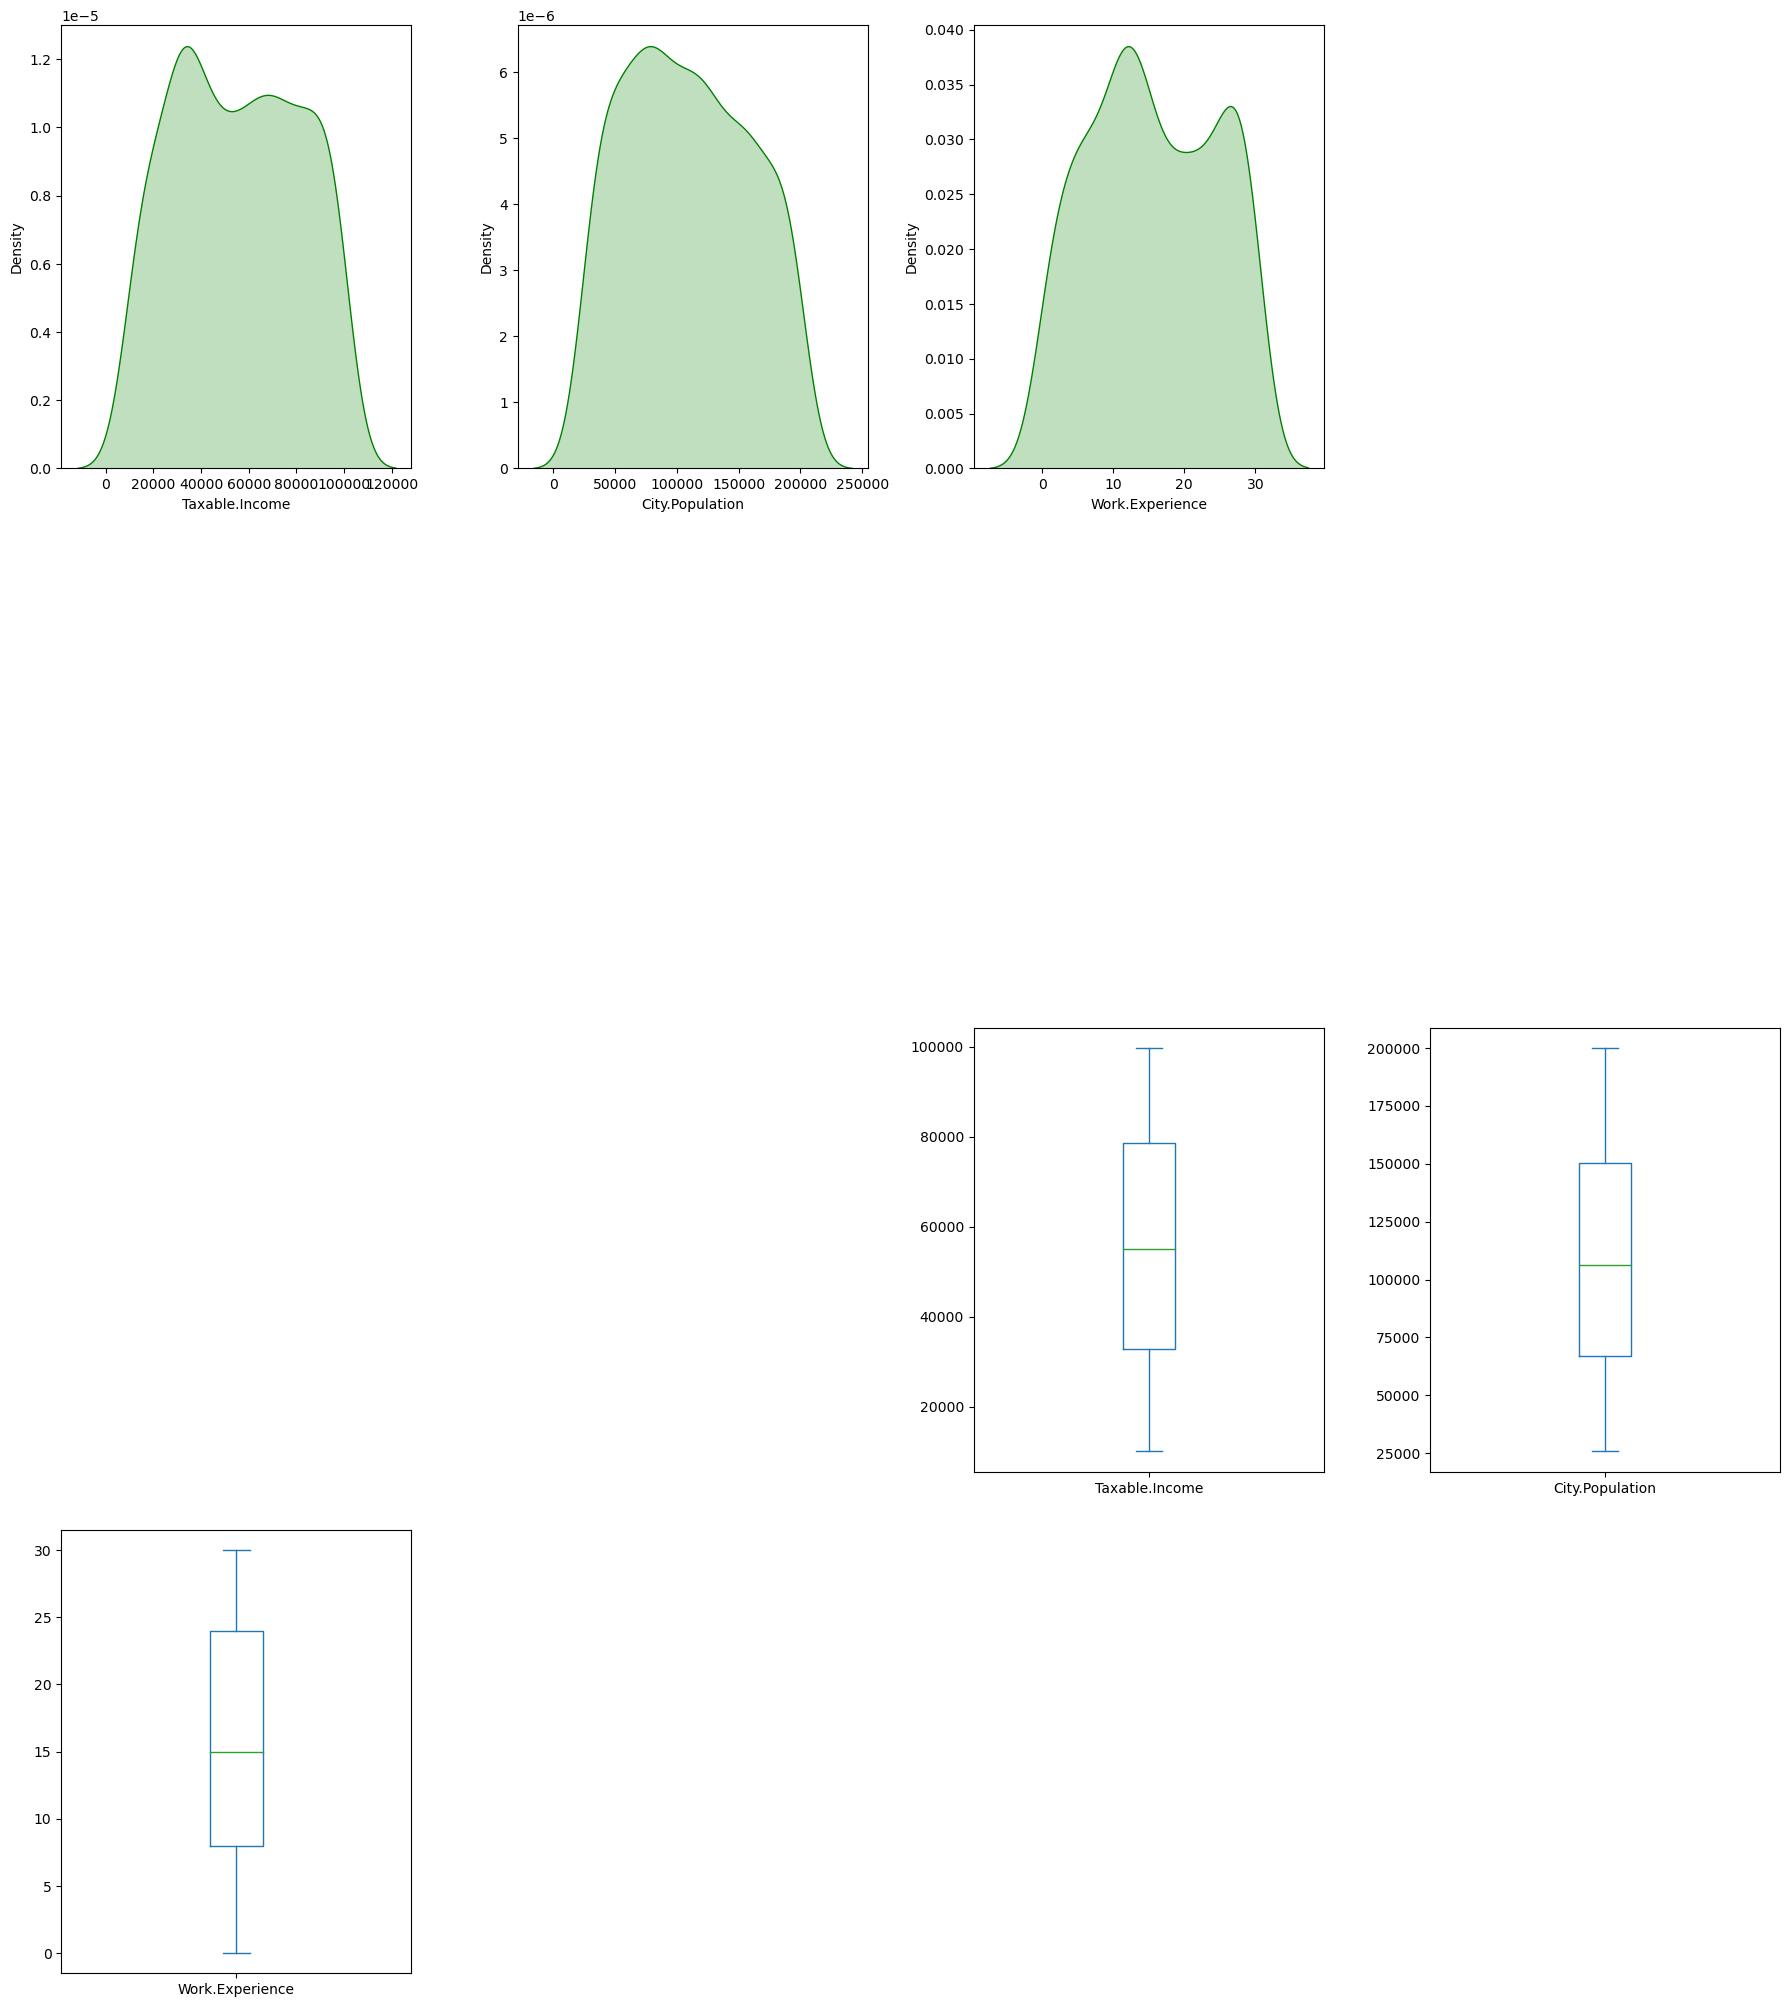

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [18]:
corr = df1.corr()

<Axes: >

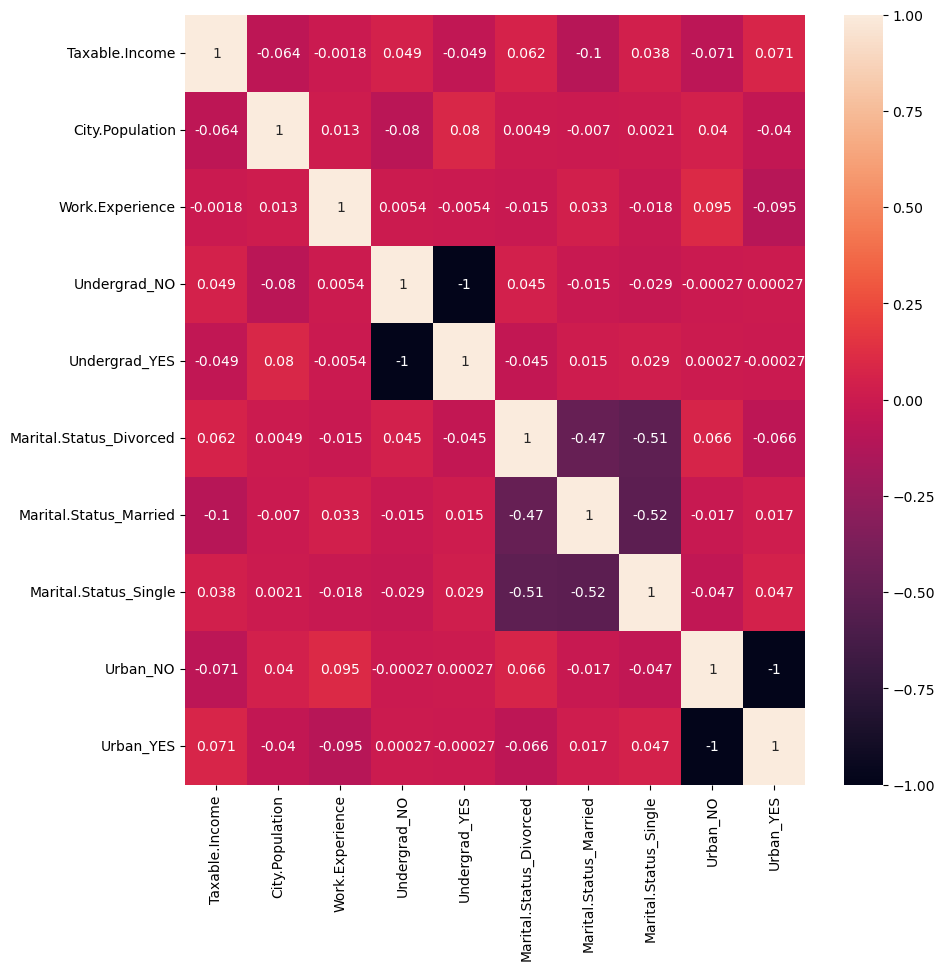

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Random Forest Model

 Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [20]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [21]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [22]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [24]:
y_train.value_counts()


good     383
risky     97
Name: Taxable.Income, dtype: int64

In [25]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7479166666666667

In [26]:
pred_train = model.predict(x_train)


In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[383,   0],
       [  0,  97]], dtype=int64)

In [29]:
pred_test = model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.7

In [31]:
confusion_matrix(y_test,pred_test)

array([[84,  9],
       [27,  0]], dtype=int64)

In [32]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [33]:
df_t

,Actual,Predicted
229,good,good
162,good,risky
83,good,risky
122,risky,good
176,good,good
...,...,...
423,good,risky
424,good,good
534,good,good
479,good,good


# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%
As seen in the confusion matrix of Test data 94 instances are presdected correctly and 26 instances are not

In [34]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [35]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [36]:
model.feature_importances_

array([0.52525009, 0.36072263, 0.01606758, 0.01658679, 0.0157285 ,
       0.01661935, 0.01581904, 0.01549418, 0.01771185])

In [37]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [38]:
fi

,feature,importance
0,City.Population,0.525250
1,Work.Experience,0.360723
8,Urban_YES,0.017712
5,Marital.Status_Married,0.016619
3,Undergrad_YES,0.016587
2,Undergrad_NO,0.016068
6,Marital.Status_Single,0.015819
4,Marital.Status_Divorced,0.015728
7,Urban_NO,0.015494


As seen in the above table city population is most important feature

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings

# Suppressing warnings
warnings.filterwarnings('ignore')


In [4]:
# Data collection and description
df = pd.read_csv("C:\\Users\\chakri\\Downloads\\Fraud_check (2).csv")


In [5]:

# Copying the dataframe to avoid modifying the original data
df1 = df.copy()

In [6]:

# Displaying the first few rows of the dataframe
df1.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:

# Descriptive statistics of the numerical columns
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [8]:

# Checking for missing values
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:

# Checking data types of columns
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

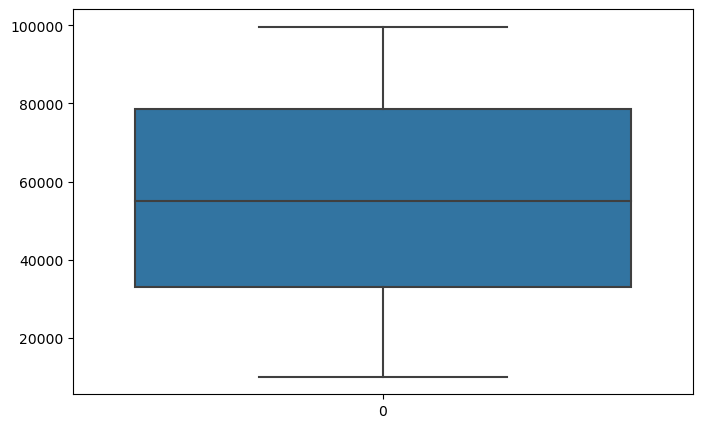

In [10]:
# Outlier Check
plt.figure(figsize=(8, 5))
ax = sns.boxplot(df1['Taxable.Income'])
plt.show()


Skewness: 0.030014788906377175
Kurtosis: -1.1997824607083138


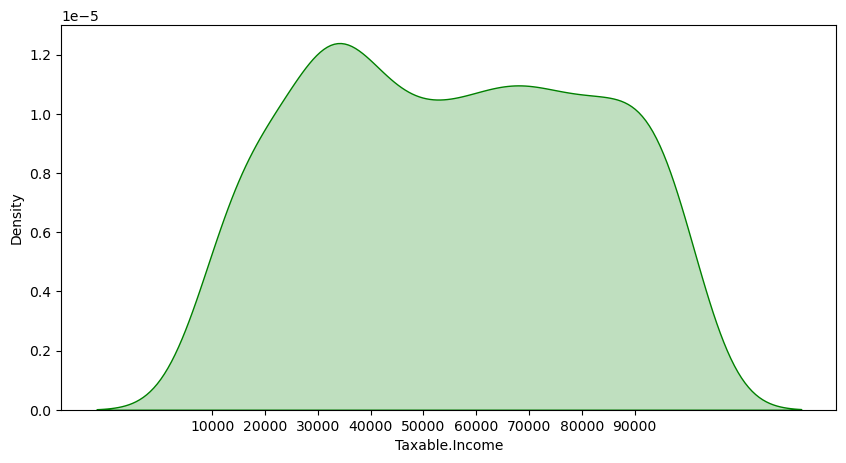

In [11]:
# Skewness and Kurtosis
plt.figure(figsize=(10, 5))
print("Skewness: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
sns.kdeplot(df1['Taxable.Income'], shade=True, color='g')
plt.xticks([i for i in range(10000, 100000, 10000)])
plt.show()


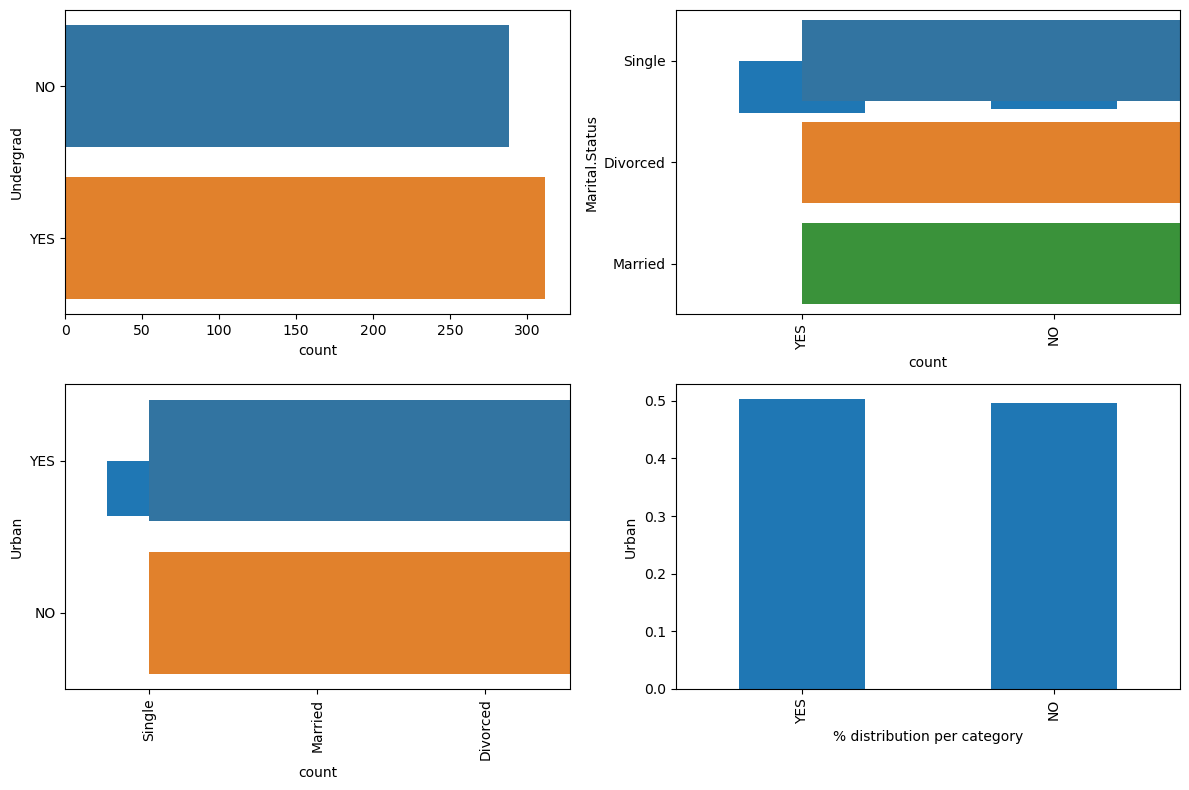

In [12]:
# Categorical Variables Exploration
obj_columns = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(12, 8))
for i, col in enumerate(obj_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df1, y=col)
    plt.subplot(2, 2, i + 1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()


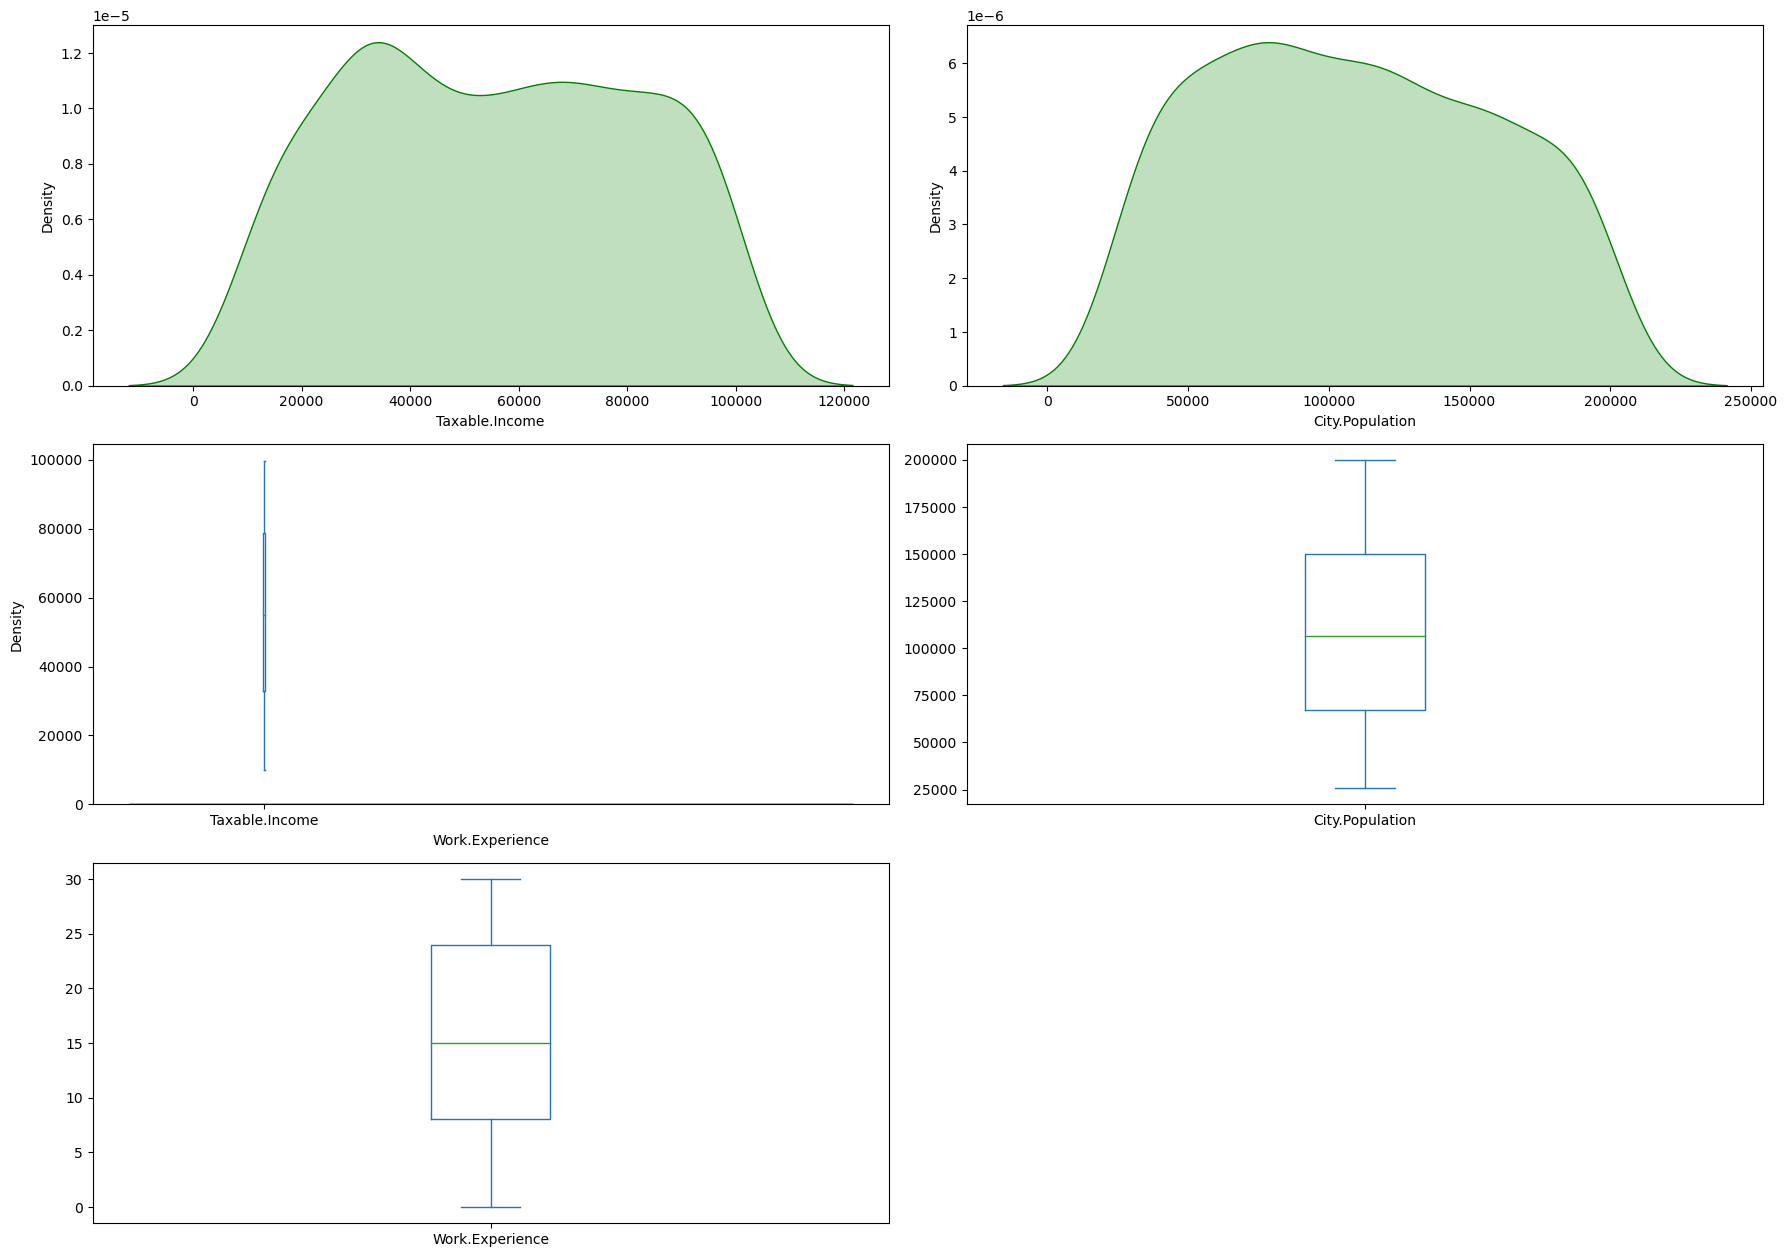

In [13]:
# Numerical Variables Exploration
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_columns, 1):
    plt.subplot(6, 2, i)
    sns.kdeplot(df[col], color='g', shade=True)
    plt.subplot(6, 2, i + 2)
    df[col].plot.box()
plt.tight_layout()
plt.show()


In [14]:
# One-Hot Encoding for categorical variables
df1 = pd.get_dummies(df1, columns=['Undergrad', 'Marital.Status', 'Urban'])

# EDA and Visualization

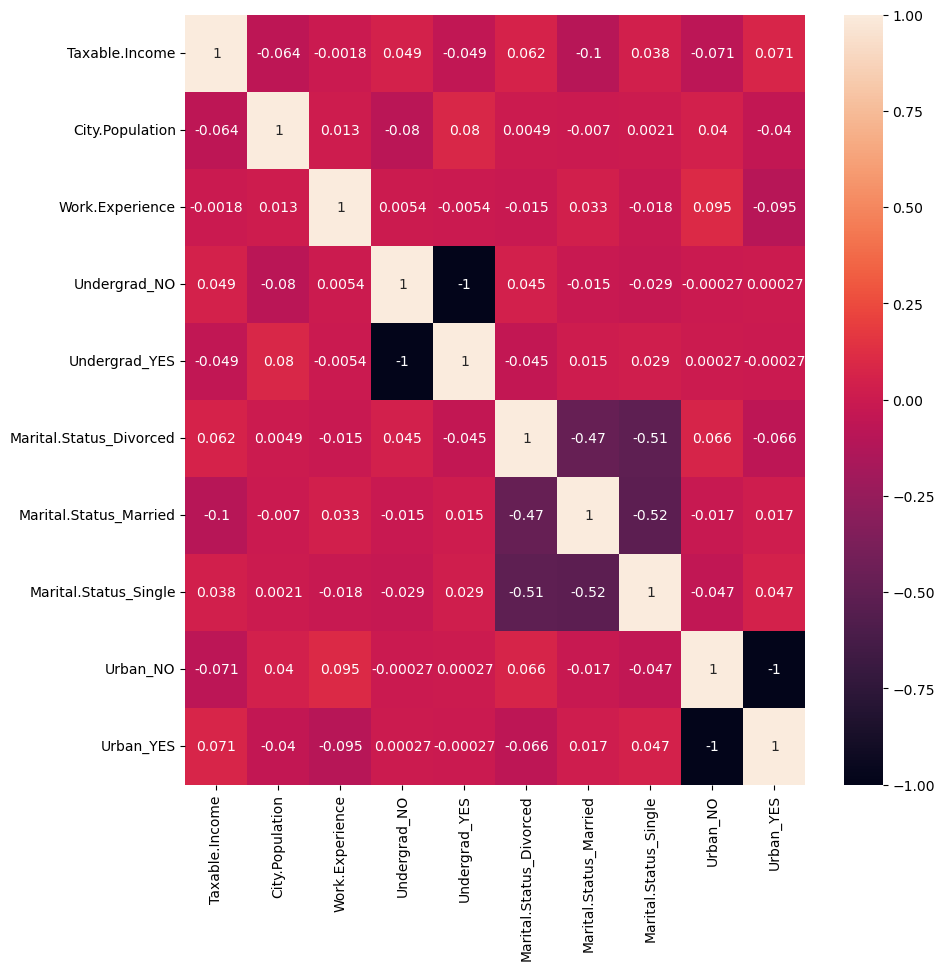

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [16]:

# Defining target variable classes
df1['Taxable.Income'] = pd.cut(df1['Taxable.Income'], bins=[0, 30000, 100000], labels=['risky', 'good'])

In [17]:

# Splitting the data into train and test sets
X = df1.iloc[:, 1:10]
y = df1.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Random Forest Model with Gini criterion
model_rf_gini = RandomForestClassifier(n_estimators=150, criterion='gini', random_state=42)
model_rf_gini.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [19]:
# Model evaluation on test data
pred_test_rf_gini = model_rf_gini.predict(x_test)
accuracy_test_rf_gini = accuracy_score(y_test, pred_test_rf_gini)
print("Random Forest (Gini) Test Accuracy:", accuracy_test_rf_gini)

Random Forest (Gini) Test Accuracy: 0.7416666666666667


In [20]:
# Confusion matrix for test data
conf_matrix_test_rf_gini = confusion_matrix(y_test, pred_test_rf_gini)
print("Confusion Matrix (Test Data - Gini):\n", conf_matrix_test_rf_gini)

Confusion Matrix (Test Data - Gini):
 [[89  5]
 [26  0]]


In [21]:
# Random Forest Model with Entropy criterion
model_rf_entropy = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)
model_rf_entropy.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=42)

In [22]:
# Model evaluation on test data
pred_test_rf_entropy = model_rf_entropy.predict(x_test)
accuracy_test_rf_entropy = accuracy_score(y_test, pred_test_rf_entropy)
print("Random Forest (Entropy) Test Accuracy:", accuracy_test_rf_entropy)


Random Forest (Entropy) Test Accuracy: 0.7416666666666667


In [23]:
# Confusion matrix for test data
conf_matrix_test_rf_entropy = confusion_matrix(y_test, pred_test_rf_entropy)
print("Confusion Matrix (Test Data - Entropy):\n", conf_matrix_test_rf_entropy)


Confusion Matrix (Test Data - Entropy):
 [[89  5]
 [26  0]]


In [24]:
# LGBM Model
model_lgbm = LGBMClassifier(random_state=42)
model_lgbm.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(random_state=42)

In [25]:
# Model evaluation on test data
pred_test_lgbm = model_lgbm.predict(x_test)
accuracy_test_lgbm = accuracy_score(y_test, pred_test_lgbm)
print("LGBM Test Accuracy:", accuracy_test_lgbm)

LGBM Test Accuracy: 0.725


In [26]:
# Confusion matrix for test data
conf_matrix_test_lgbm = confusion_matrix(y_test, pred_test_lgbm)
print("Confusion Matrix (Test Data - LGBM):\n", conf_matrix_test_lgbm)


Confusion Matrix (Test Data - LGBM):
 [[87  7]
 [26  0]]
